In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('Students.csv')
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


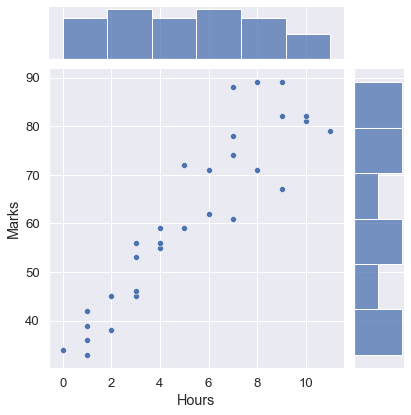

In [7]:
sns.jointplot(x='Hours', y='Marks', data=df)

In [8]:
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [9]:
x

array([[ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [11]], dtype=int64)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [48]:
x_train.shape


(21, 1)

In [49]:
x_test.shape

(9, 1)

In [50]:
y_train.shape

(21,)

In [51]:
y_test.shape

(9,)

In [52]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)
y_pred

array([41.29099526, 65.41540284, 41.29099526, 50.94075829, 55.76563981,
       46.11587678, 70.24028436, 79.89004739, 84.71492891])

In [54]:
model.score(x_train, y_train)

0.7850235137622996

In [55]:
model.score(x_test, y_test)

0.921468231342303

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

26.94512240166313

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.190869137404943

In [58]:
model.predict([[5.5]])

array([63.00296209])

In [59]:
model.coef_

array([4.82488152])

In [60]:
model.intercept_

36.46611374407583

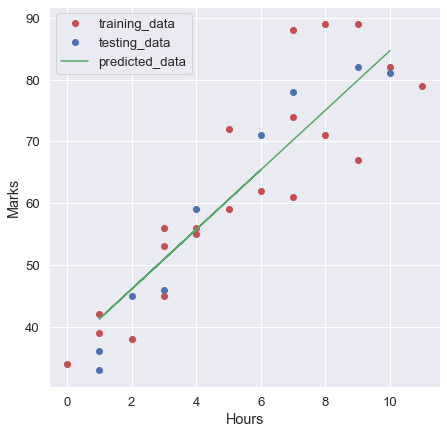

In [61]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g-', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()